# Homework 2 Python Code for Monte Carlo for pi

In [13]:
import numpy as np
import random 
import time
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def monte_carlo_for_pi(x_random_gen, y_random_gen, sample_size):
    start_time = time.perf_counter()
    points_in_circle = 0
    points_in_square = sample_size   
    for i in range (sample_size):
        x = x_random_gen()
        y = y_random_gen()
        d = x**2 + y**2
        if d <= 1:
            points_in_circle+=1
    print(f"Points in Circle {points_in_circle}", f"Points in square {points_in_square}")
    pi = 4 * points_in_circle / points_in_square
    end_time = time.perf_counter()
    time_taken = end_time - start_time
    return pi, time_taken
        

In [3]:
# Sample sizes
sample_sizes = [100, 1000, 10000, 100000, 1000000]
results_uniform_generator = {}
results_non_uniform_generator = {}

x_random_uniform_gen =lambda: random.uniform(-1, 1)
y_random_uniform_gen =lambda: random.uniform(-1, 1)
x_random_non_uniform_gen =lambda: random.triangular(-1, 1)
y_random_non_uniform_gen =lambda: random.triangular(-1, 1)


for size in sample_sizes:
    pi_value_uniform_gen, time_taken_uniform_gen = monte_carlo_for_pi(x_random_uniform_gen, y_random_uniform_gen, size)
    results_uniform_generator[size] = (pi_value_uniform_gen, time_taken_uniform_gen)
    pi_value_non_uniform_gen, time_taken_non_uniform_gen = monte_carlo_for_pi(x_random_non_uniform_gen, y_random_non_uniform_gen, size)
    results_non_uniform_generator[size] = (pi_value_non_uniform_gen, time_taken_non_uniform_gen)
    

sample_sizes = list(results_uniform_generator.keys())
pi_values_uniform_gen = [results_uniform_generator[size][0] for size in sample_sizes]
times_uniform_gen = [results_uniform_generator[size][1] for size in sample_sizes]
pi_values_non_uniform_gen = [results_non_uniform_generator[size][0] for size in sample_sizes]
times_non_uniform_gen = [results_non_uniform_generator[size][1] for size in sample_sizes]


Points in Circle 78 Points in square 100
Points in Circle 96 Points in square 100
Points in Circle 778 Points in square 1000
Points in Circle 971 Points in square 1000
Points in Circle 7872 Points in square 10000
Points in Circle 9743 Points in square 10000
Points in Circle 78410 Points in square 100000
Points in Circle 97545 Points in square 100000
Points in Circle 786108 Points in square 1000000
Points in Circle 974706 Points in square 1000000


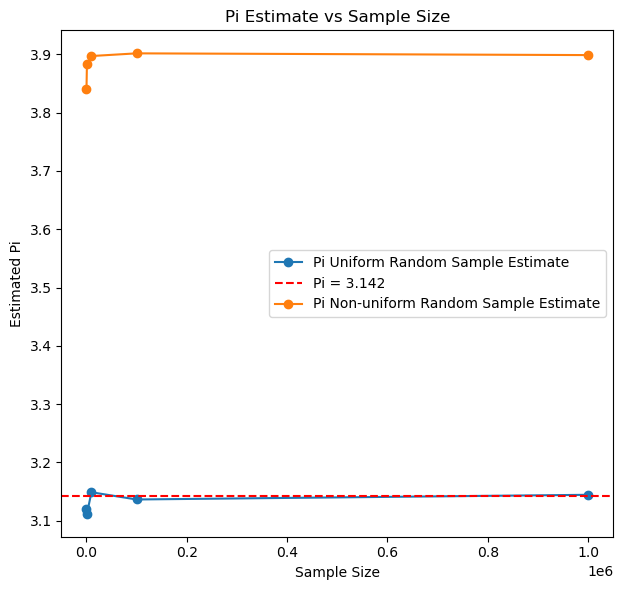

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, pi_values_uniform_gen, 'o-', label='Pi Uniform Random Sample Estimate')
plt.axhline(y=3.141592653589793238462643383279502884197, color='r', linestyle='--', label='Pi = 3.142')
plt.plot(sample_sizes, pi_values_non_uniform_gen, 'o-', label='Pi Non-uniform Random Sample Estimate')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Pi')
plt.title('Pi Estimate vs Sample Size')
plt.legend()
plt.tight_layout()
plt.show()

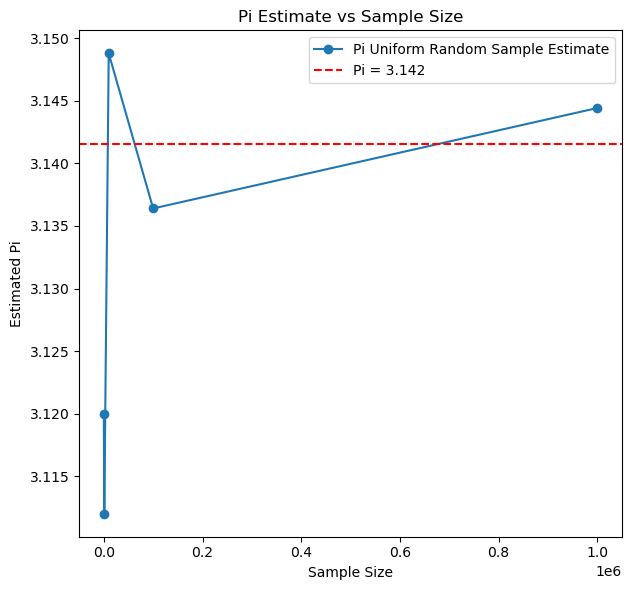

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, pi_values_uniform_gen, 'o-', label='Pi Uniform Random Sample Estimate')
plt.axhline(y=3.141592653589793238462643383279502884197, color='r', linestyle='--', label='Pi = 3.142')
plt.xlabel('Sample Size')
plt.ylabel('Estimated Pi')
plt.title('Pi Estimate vs Sample Size')
plt.legend()
plt.tight_layout()
plt.show()

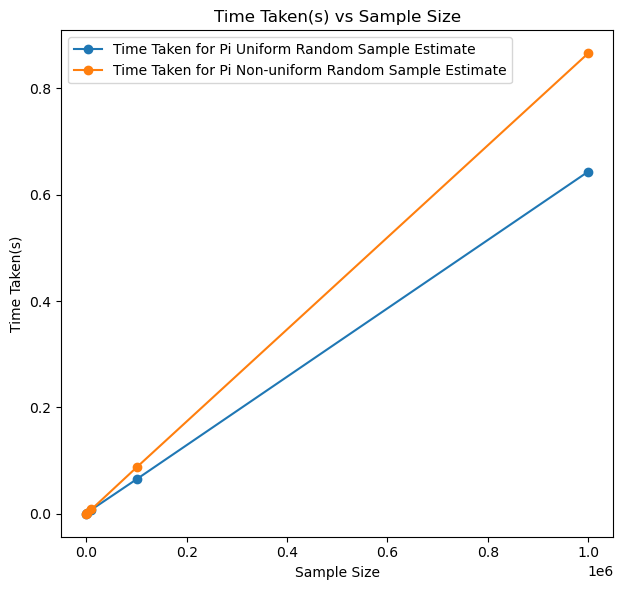

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, times_uniform_gen, 'o-', label='Time Taken for Pi Uniform Random Sample Estimate')
plt.plot(sample_sizes, times_non_uniform_gen, 'o-', label='Time Taken for Pi Non-uniform Random Sample Estimate')
plt.xlabel('Sample Size')
plt.ylabel('Time Taken(s)')
plt.title('Time Taken(s) vs Sample Size')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
sample_sizes = list(results_uniform_generator.keys())
pi_values_uniform_gen = [results_uniform_generator[size][0] for size in sample_sizes]
times_uniform_gen = [results_uniform_generator[size][1] for size in sample_sizes]

print({pi_values_uniform_gen}")
pi_values_non_uniform_gen = [results_non_uniform_generator[size][0] for size in sample_sizes]
times_non_uniform_gen = [results_non_uniform_generator[size][1] for size in sample_sizes]

[3.12, 3.112, 3.1488, 3.1364, 3.144432]


In [20]:
df = pd.DataFrame()
df['Sample Size']= sample_sizes
df['Pi Estimate-Uniform Random Generator'] = pi_values_uniform_gen
df['Time Taken-Uniform Random Generator(s)'] = times_uniform_gen
df['Pi Estimate Non-Uniform Random Generator'] = pi_values_non_uniform_gen
df['Time Taken Non-Uniform Random Generator (s)'] = times_non_uniform_gen
df


,Sample Size,Pi Estimate-Uniform Random Generator,Time Taken-Uniform Random Generator(s),Pi Estimate Non-Uniform Random Generator,Time Taken Non-Uniform Random Generator (s)
0,100,3.120000,0.000121,3.840000,0.000123
1,1000,3.112000,0.000753,3.884000,0.000820
2,10000,3.148800,0.007714,3.897200,0.008288
3,100000,3.136400,0.064964,3.901800,0.087234
4,1000000,3.144432,0.643355,3.898824,0.865864


In [21]:
df.to_csv('pi_estimation_results_homework_2.csv', index=False)